## **Categorical relationships**

In this notebook, we will continue to use the data from the World Happiness Report 2020.

### **Learning outcome:**
- Plotting relationships on categorical columns

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
happiness_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/world_happiness_report_2020.csv"
happy = pd.read_csv(happiness_url)

In [2]:
# Rename headers for some columns
happy = happy.rename(columns={"Life_Ladder":"Happiness",
                      "Log_GDP_per_capita":"Wealth",
                      "Social_support":"Social support",
                      "Healthy_life_expectancy_at_birth":"Life expectancy",
                      "Freedom_to_make_life_choices":"Freedom",
                      "Perceptions_of_corruption":"Corruption perceptions",
                      "Positive_affect":"Positive affect",
                      "Negative_affect":"Negative affect"})

Review that in previous classes, we explored the ability of seaborn to draw scatter plots showing various combinations of continuous numerical variables. Here is an example where we will vary both the size and the color of the markers

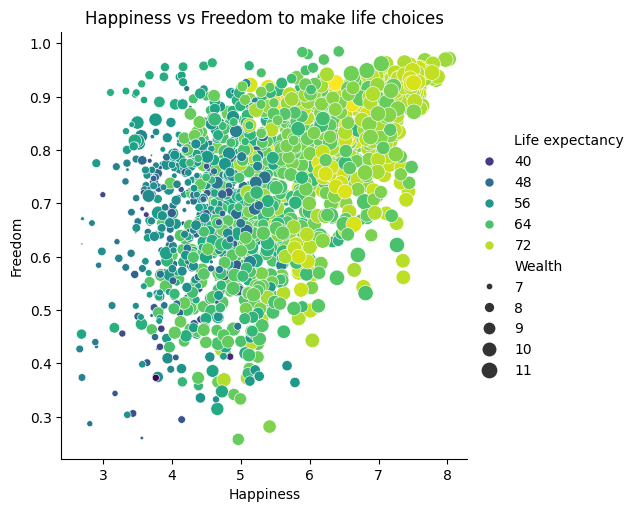

In [3]:
sns.relplot(
    data=happy,
    x="Happiness",
    y="Freedom",
    size="Wealth",
    sizes=(2,150),
    hue="Life expectancy",
    palette="viridis"
)
plt.title("Happiness vs Freedom to make life choices");

If we want to look at `Happiness` vs `Life expectancy` for all the countries, we need to have a better plot to illustrate that since we have 156 countries in the dataset. We will use the `relplot` library.

<Axes: >

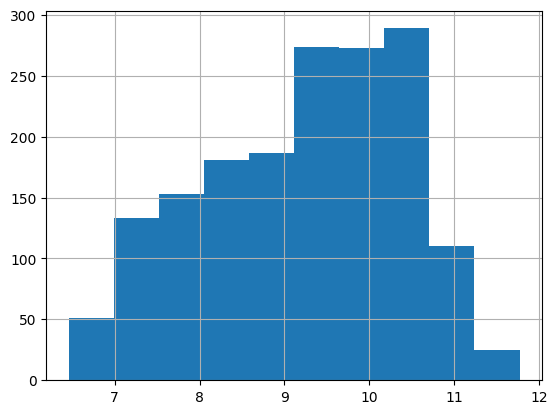

In [4]:
### Histogram of wealth does not provide us much insight
happy.Wealth.hist()

In [5]:
happy.Wealth.describe()

,Wealth
count,1676.000000
mean,9.222456
std,1.185794
min,6.457201
25%,8.304428
50%,9.406206
75%,10.193060
max,11.770276


Instead we can use `relplot` to look at the relationships across the category, `Country`

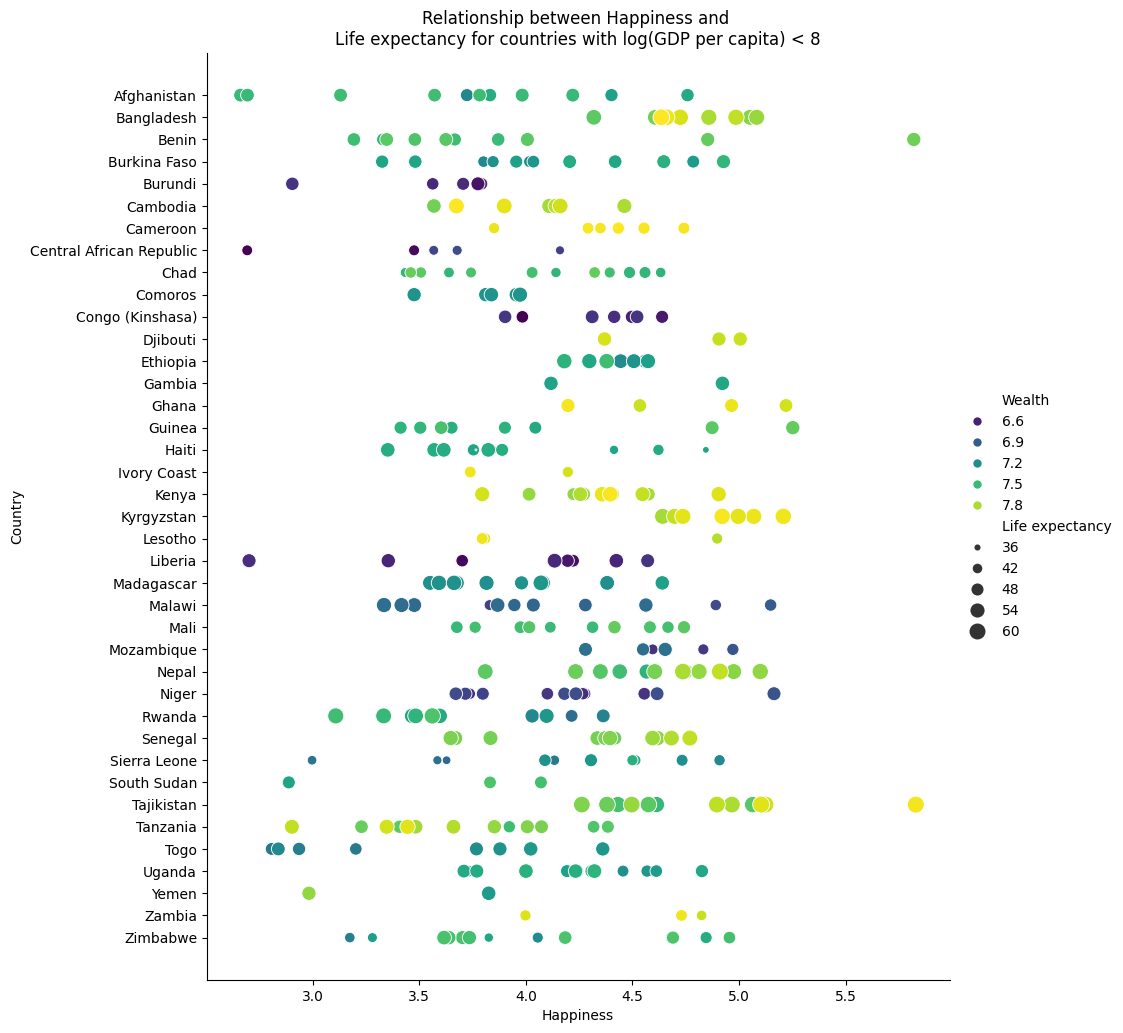

In [6]:
sns.relplot(
    data=happy[happy["Wealth"] < 8], # subset
    y="Country",
    x="Happiness",
    size="Life expectancy", #higher life expectancy, larger size
    sizes=(2,150), #range of size
    height=10,
    hue="Wealth", #color based on wealth
    palette="viridis"
)
plt.title("Relationship between Happiness and \nLife expectancy for countries with log(GDP per capita) < 8");

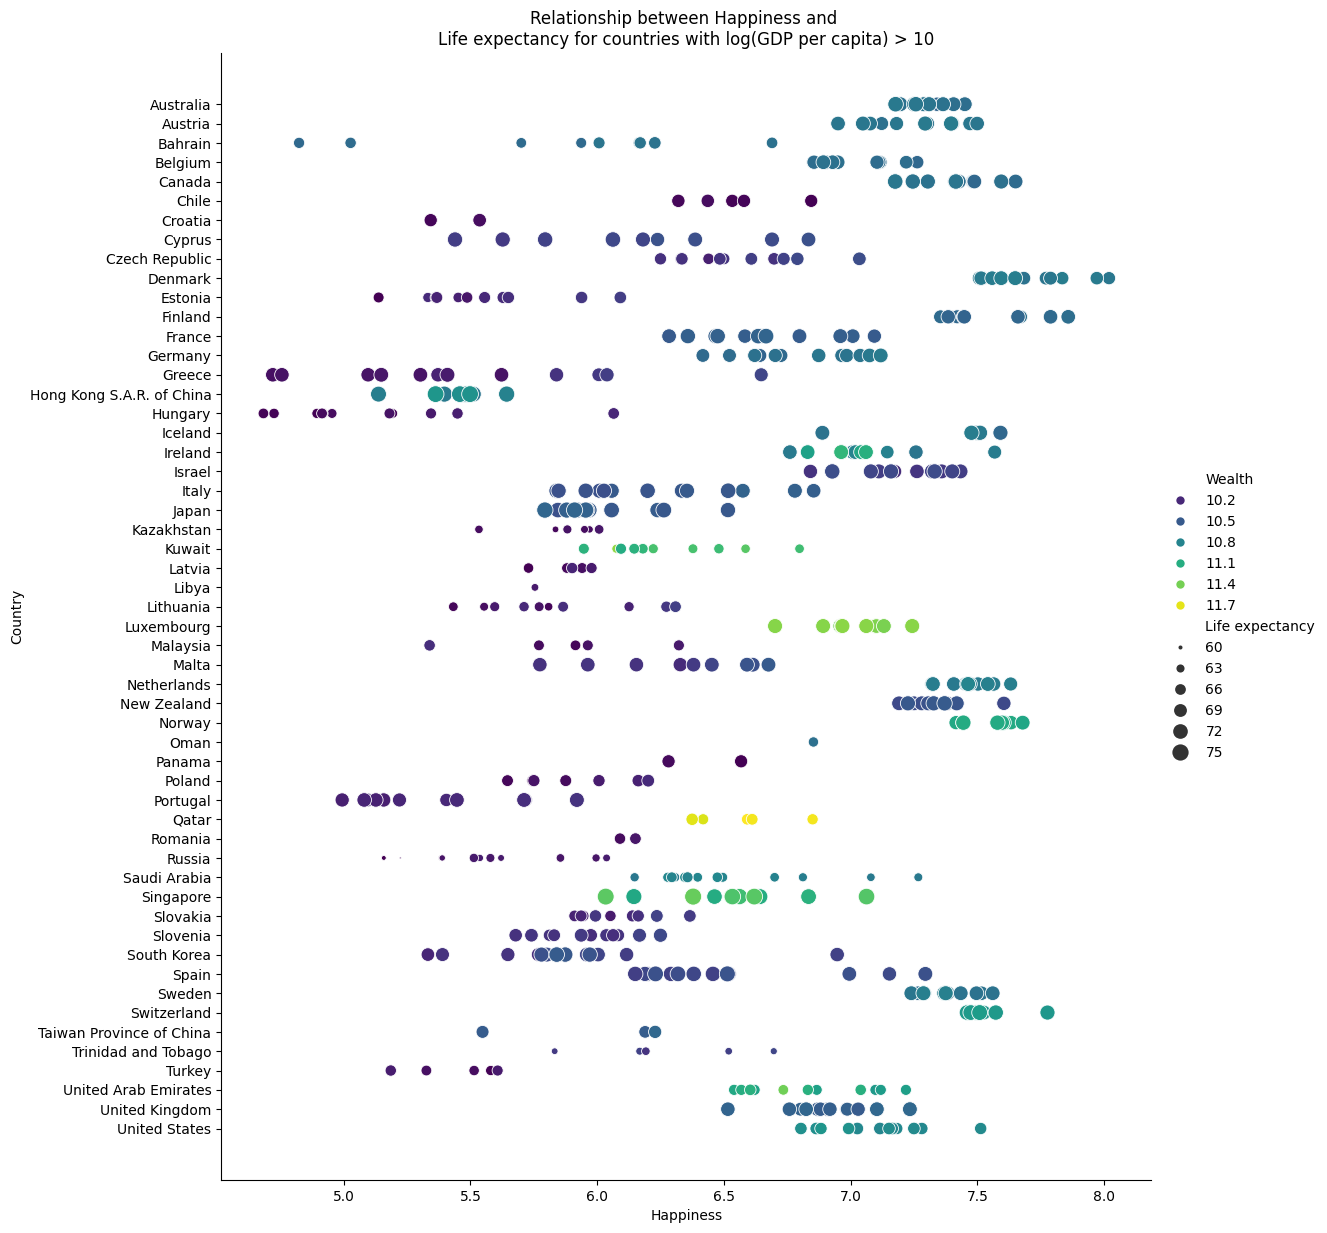

In [7]:
sns.relplot(
    data=happy[happy["Wealth"] > 10],
    y="Country",
    x="Happiness",
    size="Life expectancy",
    sizes=(2,150),
    height=12,
    hue="Wealth",
    palette="viridis"
)
plt.title("Relationship between Happiness and \nLife expectancy for countries with log(GDP per capita) > 10");

Let's take a closer look at the relationship between Wealth and Happiness for a few countries.

In [8]:
happy[(happy.Country == "France") | (happy.Country == "United States")]

,Country,Year,Happiness,Wealth,Social support,Life expectancy,Freedom,Generosity,Corruption perceptions,Positive affect,Negative affect
496,France,2005,7.093393,10.505228,0.940338,71.300003,0.894819,NaN,0.687851,0.768988,0.225094
497,France,2006,6.582700,10.521728,0.943929,71.480003,0.789121,0.121351,0.699270,0.777402,0.288682
498,France,2008,7.008065,10.535243,0.935351,71.839996,0.833327,-0.035670,0.668876,0.745672,0.280619
499,France,2009,6.283498,10.500244,0.918159,72.019997,0.798213,-0.086386,0.654168,0.762939,0.303367
500,France,2010,6.797901,10.514770,0.942955,72.199997,0.849702,-0.108060,0.622954,0.789724,0.260568
501,France,2011,6.959185,10.530512,0.921286,72.400002,0.903367,-0.106961,0.626625,0.780809,0.280995
502,France,2012,6.649365,10.527497,0.937097,72.599998,0.841320,-0.153479,0.607905,0.754120,0.252988
503,France,2013,6.667121,10.528095,0.907691,72.800003,0.877796,-0.128930,0.699069,0.800136,0.204970
504,France,2014,6.466868,10.532729,0.877505,73.000000,0.803474,-0.122516,0.655637,0.811054,0.215894
505,France,2015,6.357625,10.539174,0.895719,73.199997,0.817036,-0.143634,0.640602,0.785966,0.215400


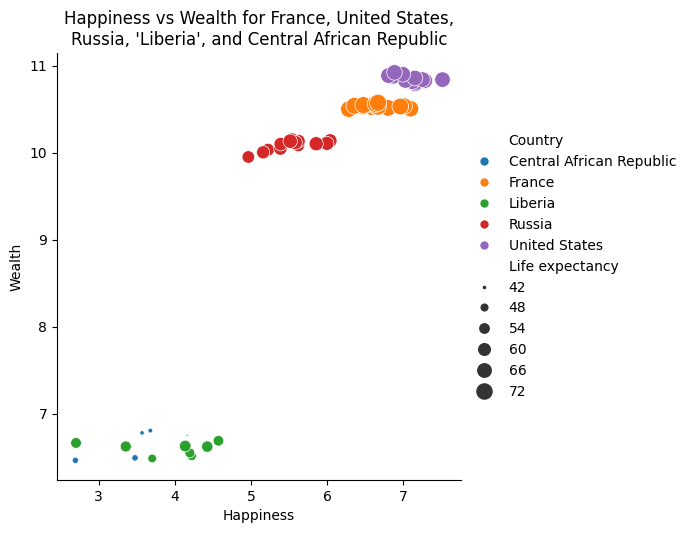

In [10]:
few_countries = happy[happy.Country.isin(['France',
                                          'United States',
                                          'Russia',
                                          'Liberia',
                                          'Central African Republic'])
                     ]
sns.relplot(
    data=few_countries,
    x="Happiness",
    y="Wealth",
    size="Life expectancy",
    sizes=(2,150),
    hue="Country"
)
plt.title("Happiness vs Wealth for France, United States,\n" +
         "Russia, 'Liberia', and Central African Republic");

Instead of using `hue`, we can also use the marker styles to help identify data points for each country (as long as the number of countries is not too large).

We can still use the sizes to include additional information in the plot that uses marker styles

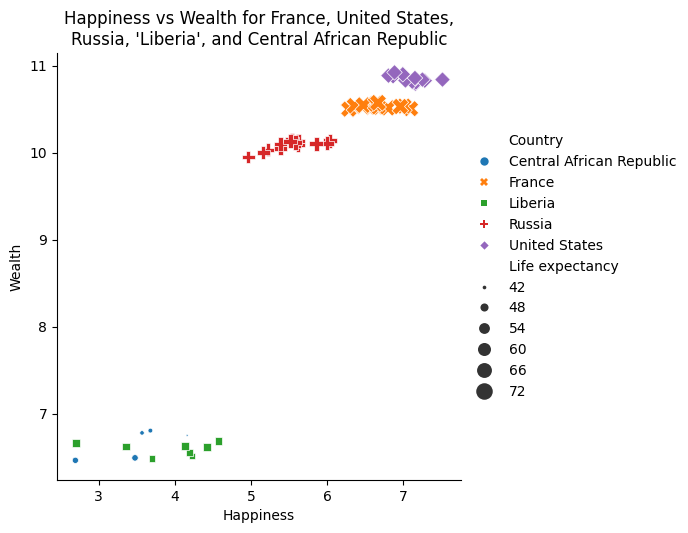

In [11]:
sns.relplot(
    data=few_countries,
    x="Happiness",
    y="Wealth",
    size="Life expectancy",
    sizes=(2, 150),
    style="Country",
    hue="Country"
)
plt.title("Happiness vs Wealth for France, United States,\n" +
         "Russia, 'Liberia', and Central African Republic");

## Plotting scatter patterns in `relplot`

In this plot above, the marker styles are sufficient to show the pattern that people in wealthier countries are happier. But some of the data points for Liberia and Central African Republic overlap. Perhaps the most powerful way to split up our data into categories is simply to draw multiple charts with the same axes. This approach has many names (different tools refer to it as a trellis, lattice or grid chart) but here we will call it small multiples. We can draw these in seaborn by assigning column names to the `row` and `col` argument to `relplot`

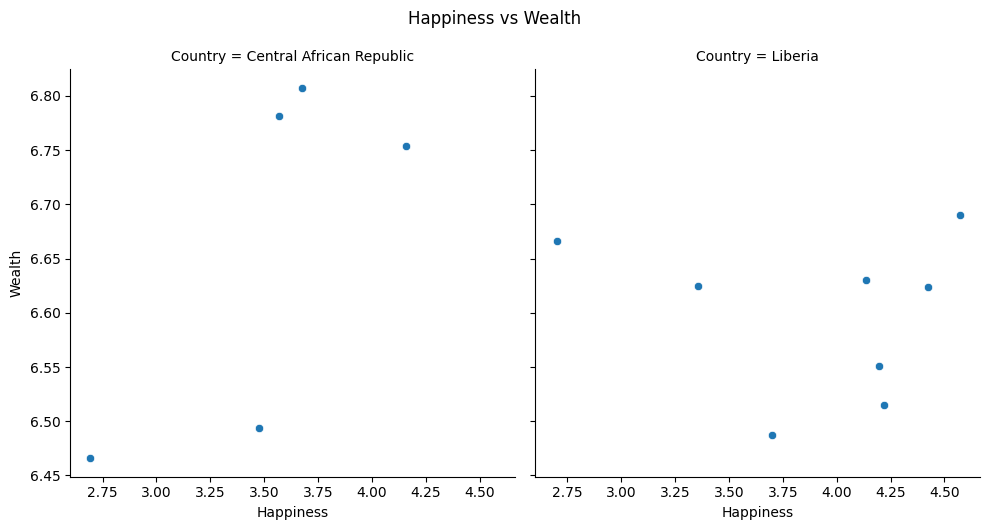

In [13]:
g=sns.relplot(
    data=happy[happy.Country.isin(['Liberia',
                                   'Central African Republic'])],
    x="Happiness",
    y="Wealth",
    col="Country",
)
g.fig.suptitle("Happiness vs Wealth", y=1.05);

Because the two plots share the same axes, it is easy to compare them.

Notice that now each plot gets its own title telling us which country it is displaying. To display an overall title we need to call `suptitle` (supertitle) on the figure. In fact, `relplot` always creates a grid of plots, even when we draw a single plot. This is the reason behind the variable name `g` that we use for the return value. When using a supertitle, we have to tell seaborn how much space we want between the charts and the title by setting the `y` argument. The value of `1.05` usually looks good, but we can increase it if we want more spacing.

If we set `col` and `row` separately, we will get a two dimensional grid. Let’s compare the `Life expectancy` amongst people based on happiness. First let's create a new column in the dataset to categorize happiness.

In [14]:
happy.Happiness.describe()

,Happiness
count,1704.000000
mean,5.437155
std,1.121149
min,2.661718
25%,4.610970
50%,5.339557
75%,6.273522
max,8.018934


In [16]:
# Create a new column in the dataframe to group each data point into two groups.
happy['ishappy'] = [True if x > 5.3 else False for x in happy['Happiness']]

In [19]:
happy.head()

,Country,Year,Happiness,Wealth,Social support,Life expectancy,Freedom,Generosity,Corruption perceptions,Positive affect,Negative affect,ishappy
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,False
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,False
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,False
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,False
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,False


A useful trick when we want to display small multiples using a single category that has a large number of variables is to **wrap columns**.

This works particularly well when the values have a natural order. For example, the year column behaves like a category in that it takes a number of descrete values, but those values have an obvious ordering. Trying to display a dozen separate plots, for example one for each year, on a single row has obvious drawbacks. If we instead specify `col_wrap`, then we can limit each row to a sensible number of charts.

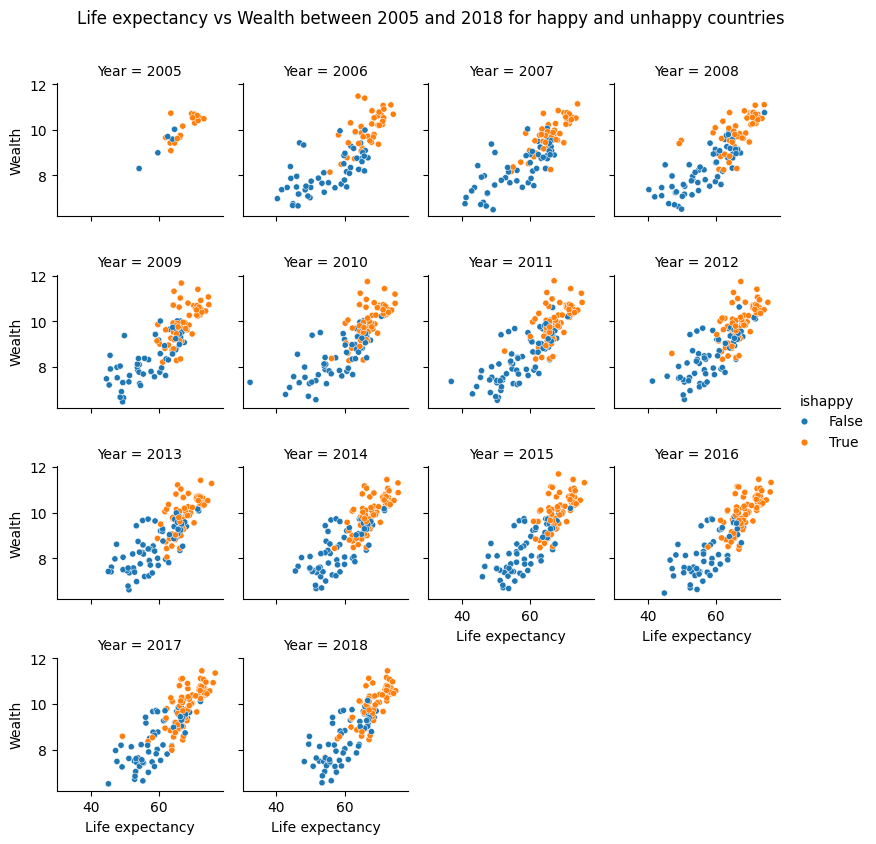

In [17]:
## Wrapped columns into small multiples of chart per row
g=sns.relplot(
    data=happy,
    x="Life expectancy",
    y="Wealth",
    hue="ishappy",
    col="Year",
    col_wrap=4,
    height=2,
    s=20
)
g.fig.suptitle("Life expectancy vs Wealth between 2005 and 2018 for happy and unhappy countries", y=1.05);

In [21]:
## Filter to find the countr(ies) that are happy and have specific life expectancy and wealth
happy[(happy.ishappy == True) &
      (happy.Year == 2012) &
      (happy["Life expectancy"].between(40,52)) &
      (happy.Wealth.between(8,9))]

,Country,Year,Happiness,Wealth,Social support,Life expectancy,Freedom,Generosity,Corruption perceptions,Positive affect,Negative affect,ishappy
1120,Nigeria,2012,5.492954,8.582878,0.81758,47.119999,0.651689,0.054988,0.900431,0.810906,0.209099,True
